# Cem OZAN / 250201003

#  Deciding Number of Clusters

In [56]:
import pandas as pd
from sklearn.cluster import KMeans
import time
import statistics
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import datasets

In [7]:
Data = {
    "x":[35,34,32,37,33,33,31,27,35,34,62,54,57,47,50,57,59,52,61,47,50,48,39,40,45,47,39,44,50,48],
    "y":[79,54,52,77,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,23,22,13,14,22,7,29,25,9,8]
}

df = DataFrame(Data,columns=["x","y"])

In [8]:
distances = []

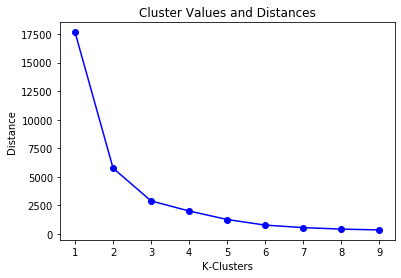

In [10]:
K = range(1,10)
for k in K:
    ClusterInfo = kmeanModel = KMeans(n_clusters=k).fit(df)
    distances.append(ClusterInfo.inertia_)

plt.plot(K,distances,"bo-")
plt.xlabel("K-Clusters")
plt.ylabel("Distance")
plt.title("Cluster Values and Distances")
plt.show()

#  K-Means Algorithm with 3 Clusters

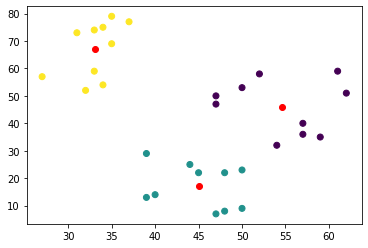

In [13]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_

plt.scatter(df["x"],df["y"], c= kmeans.labels_.astype(float))
plt.scatter(centroids[:,0],centroids[:,1],c="red")
plt.show()

# Using K-Means++

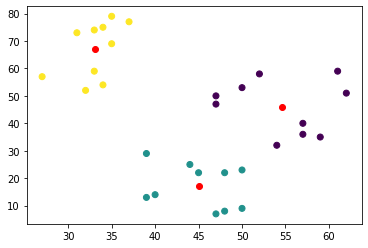

In [14]:
kmeanspp = KMeans(n_clusters = 3 , init="k-means++").fit(df)
centroidspp = kmeans.cluster_centers_

plt.scatter(df["x"],df["y"], c= kmeanspp.labels_.astype(float))
plt.scatter(centroidspp[:,0],centroidspp[:,1],c="red")
plt.show()

# Calculating the Time Differecence

In [23]:
KMeansStartTime = time.time()

kmeans = KMeans(n_clusters = 3).fit(df)
kmeansDistance = kmeans.inertia_
kmeans = KMeans(n_clusters = 4).fit(df)
kmeansDistance += kmeans.inertia_
kmeans = KMeans(n_clusters = 5).fit(df)
kmeansDistance += kmeans.inertia_

KMeansStopTime = time.time()

KMeansppStartTime = time.time()

kmeans = KMeans(n_clusters = 3, init="k-means++").fit(df)
kmeansppDistance = kmeans.inertia_
kmeans = KMeans(n_clusters = 4, init="k-means++").fit(df)
kmeansppDistance += kmeans.inertia_
kmeans = KMeans(n_clusters = 5, init="k-means++").fit(df)
kmeansppDistance += kmeans.inertia_

KMeansppStopTime = time.time()

print("KMeans Time ",KMeansStopTime-KMeansStartTime)
print("KMeans Total Distance ",kmeansDistance)

print("KMeans++ Time ",KMeansppStopTime-KMeansppStartTime)
print("KMeans++ Total Distance ",kmeansppDistance)

KMeans Time  0.06202268600463867
KMeans Total Distance  6136.200000000001
KMeans++ Time  0.06000399589538574
KMeans++ Total Distance  6136.200000000001


# Hierarchical (Agglomerative) Clustering

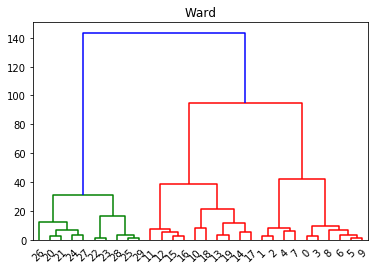

In [25]:
dendrogram(linkage(df,"ward"))
plt.title("Ward")
plt.show()

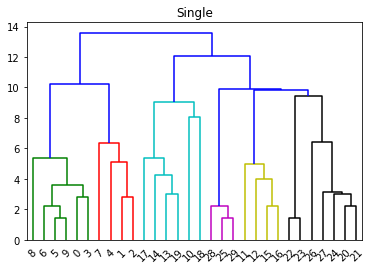

In [26]:
dendrogram(linkage(df,"single"))
plt.title("Single")
plt.show()

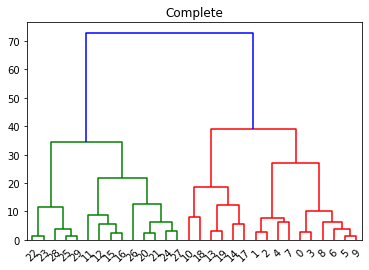

In [27]:
dendrogram(linkage(df,"complete"))
plt.title("Complete")
plt.show()

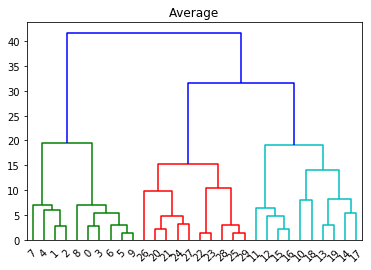

In [28]:
dendrogram(linkage(df,"average"))
plt.title("Average")
plt.show()

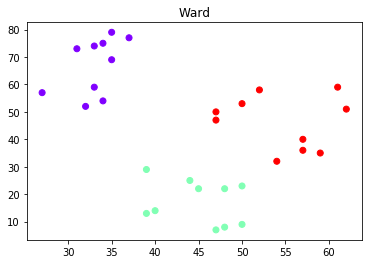

In [31]:
cluster = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
cluster.fit_predict(df)
plt.scatter(df["x"],df["y"],c=cluster.labels_,cmap="rainbow")
plt.title("Ward")
plt.show()

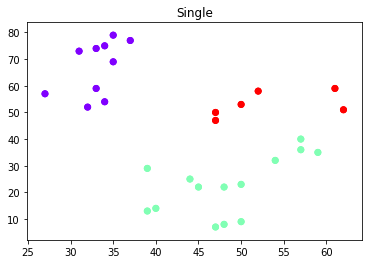

In [34]:
cluster = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="single")
cluster.fit_predict(df)
plt.scatter(df["x"],df["y"],c=cluster.labels_,cmap="rainbow")
plt.title("Single")
plt.scatter(df["x"],df["y"],c=cluster.labels_,cmap="rainbow")
plt.show()

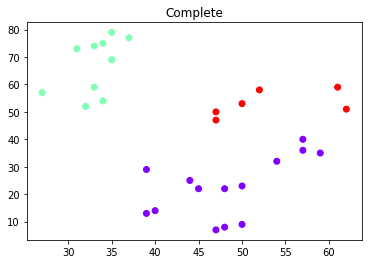

In [35]:
cluster = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")
cluster.fit_predict(df)
plt.scatter(df["x"],df["y"],c=cluster.labels_,cmap="rainbow")
plt.title("Complete")
plt.show()

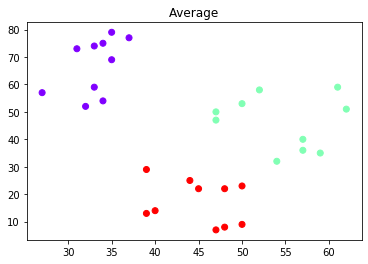

In [36]:
cluster = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="average")
cluster.fit_predict(df)
plt.scatter(df["x"],df["y"],c=cluster.labels_,cmap="rainbow")
plt.title("Average")
plt.show()

# DBSCAN Clustering Algorithm

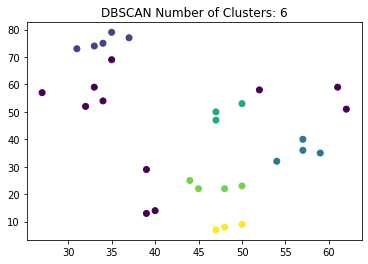

In [39]:
clustering = DBSCAN(eps=5,min_samples=3).fit(df)
labels = clustering.labels_
numberofclusters = len(set(labels))
plt.title("DBSCAN Number of Clusters: %d" % numberofclusters)
plt.scatter(df["x"],df["y"],c=clustering.labels_.astype(float))
plt.show()

# Cluster Shapes

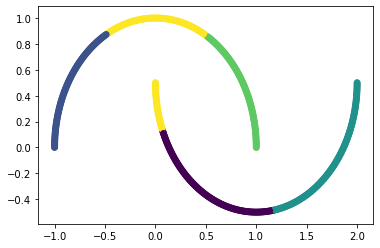

In [42]:
X,y = datasets.make_moons(n_samples=500)
kmeans = KMeans(n_clusters=5).fit(X)
plt.scatter(X[:,0],X[:,1],c=kmeansmoon.labels_.astype(float))
plt.show()

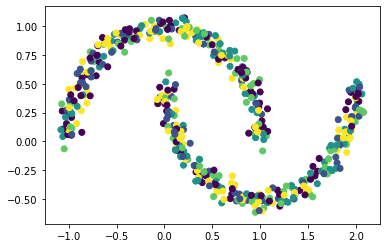

In [43]:
X,y = datasets.make_moons(n_samples=500,noise=0.05)
kmeans = KMeans(n_clusters=5).fit(X)
plt.scatter(X[:,0],X[:,1],c=kmeansmoon.labels_.astype(float))
plt.show()

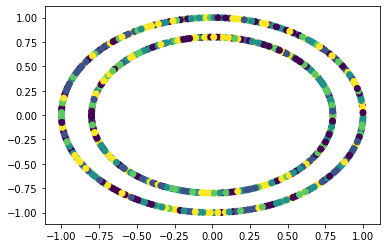

In [44]:
X,y = datasets.make_circles(n_samples=500)
kmeans = KMeans(n_clusters=5).fit(X)
plt.scatter(X[:,0],X[:,1],c=kmeansmoon.labels_.astype(float))
plt.show()

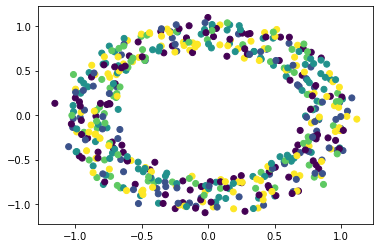

In [45]:
X,y = datasets.make_circles(n_samples=500,noise=0.05)
kmeans = KMeans(n_clusters=5).fit(X)
plt.scatter(X[:,0],X[:,1],c=kmeansmoon.labels_.astype(float))
plt.show()

# Viewing Cluster Assingments

In [52]:
kmeans = KMeans(n_clusters=3).fit(df)
clusters = kmeans.labels_
i = 0
print ("Cluster    X            Y")
for row in df.iterrows():
    print(clusters[i],"        ",row[1]["x"],"         ",row[1]["y"])
    i += 1

Cluster    X            Y
0          35           79
0          34           54
0          32           52
0          37           77
0          33           59
0          33           74
0          31           73
0          27           57
0          35           69
0          34           75
2          62           51
2          54           32
2          57           40
2          47           47
2          50           53
2          57           36
2          59           35
2          52           58
2          61           59
2          47           50
1          50           23
1          48           22
1          39           13
1          40           14
1          45           22
1          47           7
1          39           29
1          44           25
1          50           9
1          48           8


In [55]:
cluster = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
cluster.fit_predict(df)
clusters = cluster.labels_
i = 0
print ("Cluster    X            Y")
for row in df.iterrows():
    print(clusters[i],"        ",row[1]["x"],"         ",row[1]["y"])
    i += 1

Cluster    X            Y
0          35           79
0          34           54
0          32           52
0          37           77
0          33           59
0          33           74
0          31           73
0          27           57
0          35           69
0          34           75
2          62           51
2          54           32
2          57           40
2          47           47
2          50           53
2          57           36
2          59           35
2          52           58
2          61           59
2          47           50
1          50           23
1          48           22
1          39           13
1          40           14
1          45           22
1          47           7
1          39           29
1          44           25
1          50           9
1          48           8


# Identifying Data Outliers (Noise)

In [57]:
values = [-100,-75,1,2,3,4,5,75,100]
print("Mean",statistics.mean(values))
print("Standard Deviation",statistics.stdev(values))

Mean 1.6666666666666667
Standard Deviation 62.52999280345393


In [61]:
mean = statistics.mean(values)
stdev = statistics.stdev(values)

print("Mean ",mean)
print("Standard deviation ",stdev)

newvalues = []
for i in range(len(values)):
    if values[i] < (mean-stdev) or values[i] > (mean + stdev):
        print(i,values[i])

Mean  1.6666666666666667
Standard deviation  62.52999280345393
0 -100
1 -75
7 75
8 100


In [62]:
print("Starting values ",values)
print("Mean ",mean)
print("Standard deviation ",stdev)
for i in range(len(values)):
    if values[i] > (mean-stdev) and values[i] < (mean + stdev):
        newvalues.append(values[i])
        
mean = statistics.mean(newvalues)
stdev = statistics.stdev(newvalues)

print("\nList without outliers ",newvalues)
print("Mean ",mean)
print("Standard Deviation ",stdev)

Starting values  [-100, -75, 1, 2, 3, 4, 5, 75, 100]
Mean  1.6666666666666667
Standard deviation  62.52999280345393

List without outliers  [1, 2, 3, 4, 5]
Mean  3
Standard Deviation  1.5811388300841898


# Identifying Outliers Using DBSCAN

In [72]:
clustering = DBSCAN(eps=5,min_samples=3).fit(df)
labels = clustering.labels_

i = 0
print("Index    Cluster   X        Y")
for row in df.iterrows():
    if labels[i] == -1:
        print(i,"      ",labels[i],"      ",row[1]["x"],"      ",row[1]["y"])
    i += 1

Index    Cluster   X        Y
1        -1        34        54
2        -1        32        52
4        -1        33        59
7        -1        27        57
8        -1        35        69
10        -1        62        51
17        -1        52        58
18        -1        61        59
22        -1        39        13
23        -1        40        14
26        -1        39        29
